In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
train_data = train_data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [4]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
test_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
type(train_data)

pandas.core.frame.DataFrame

In [7]:
# Preprocessing
trainX = train_data.values[:,0]
trainX = trainX.tolist()

trainY = train_data.values[:,1]
trainY = trainY.tolist()

In [8]:
import matplotlib.pyplot as plt

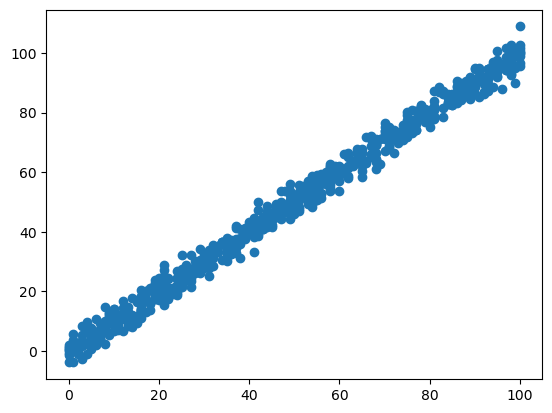

In [9]:
plt.scatter(trainX,trainY)
plt.show()

In [10]:
from scipy import stats

In [11]:
slop, intercept, r, p, strr = stats.linregress(trainX, trainY)

In [12]:
r

0.9953399077212528

In [13]:
linear = LinearRegression()

In [14]:
trainX = train_data.values[:,0]
trainY = train_data.values[:,1]

In [15]:
Xtrain ,Xtest, yTrain, Ytest = train_test_split(trainX, trainY, test_size=0.3)

In [16]:
Xtrain = Xtrain.reshape(-1,1)
yTrain = yTrain.reshape(-1,1)

In [17]:
Xtrain.shape

(489, 1)

In [18]:
yTrain.shape

(489, 1)

In [19]:
linear.fit(Xtrain,yTrain )

LinearRegression()

In [20]:
Xtest = Xtest.reshape(-1,1)

In [21]:
y_predict = linear.predict(Xtest)

In [22]:
Ytest = Ytest.reshape(-1,1)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse = mean_squared_error(Ytest,y_predict)

In [25]:
mse

7.328214026803776

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2 = r2_score(Ytest,y_predict)

In [28]:
r2

0.9901656409043813

In [29]:
from sklearn.datasets import make_regression

In [30]:
X, y = make_regression(n_samples = 10000, n_features=5, noise= 10, random_state=45)

In [31]:
X.shape

(10000, 5)

In [32]:
y.shape

(10000,)

In [33]:
X0 = X[:,2]

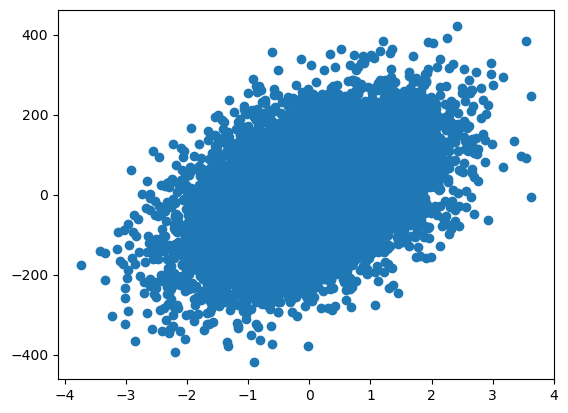

In [34]:
plt.scatter(X0,y)
plt.show()

In [35]:
linear = LinearRegression()

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3)

In [37]:
xtrain.shape

(7000, 5)

In [38]:
xtest.shape

(3000, 5)

In [39]:
ytrain.shape

(7000,)

In [40]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [41]:
y_predict = linear.predict(xtest)

In [42]:
mse = mean_squared_error(ytest,y_predict)

In [43]:
mse

101.17430920586654

In [44]:
lasso = Lasso(0.1)

In [45]:
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [46]:
y_predict = lasso.predict(xtest)

In [47]:
mse = mean_squared_error(ytest,y_predict)

In [48]:
mse

101.15905602381663

In [59]:
ridge = Ridge(0.01)

In [60]:
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.01)

In [61]:
y_predict = ridge.predict(xtest)

In [62]:
mse = mean_squared_error(ytest,y_predict)

In [63]:
mse

101.17428423942152

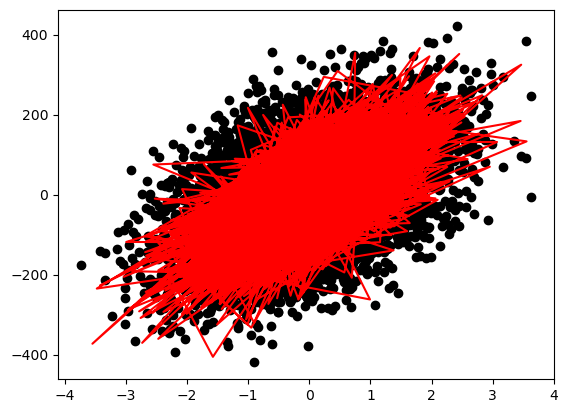

In [69]:
plt.scatter(X0,y, color='black')
plt.plot(xtest[:,0],y_predict, color='red' )
plt.show()

In [68]:
y_predict

array([-33.34288027, 131.2770289 ,  20.76492398, ..., -36.85859439,
        64.40300498,  -6.11527073])

In [70]:
ridge.coef_

array([73.86413331, 50.51481467, 52.4158329 , 27.20870773, 37.79574333])

In [72]:
ridge.intercept_

0.16735470467386493

In [74]:
def linear(x):
    return ridge.coef_[0] * x + intercept
predicted = list(map(linear,xtest[:,0]))

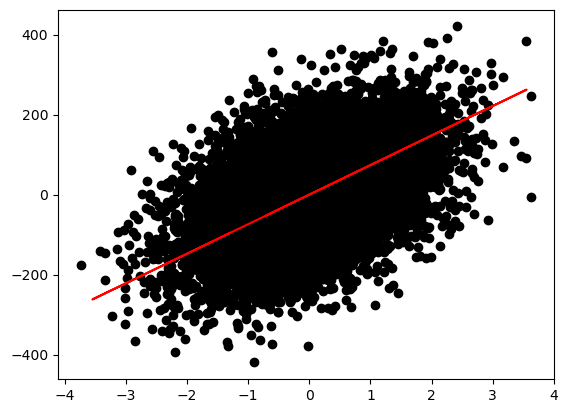

In [76]:
plt.scatter(X0,y, color='black')
plt.plot(xtest[:,0],predicted, color='red' )
plt.show()